## SHAP python 구현

데이터셋 : 보스턴 주택 데이터셋 

In [5]:
import pandas as pd 
import numpy as np  

from xgboost import XGBRegressor, plot_importance  
from sklearn.model_selection import train_test_split  

import shap 

X, y = shap.datasets.boston()  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2022)  

model = XGBRegressor()  
model.fit(X_train, y_train)   

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [6]:
shap.initjs()  
explainer = shap.TreeExplainer(model)  
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


긍정적인 영향 : 빨간색 
부정적인 영향 : 파란색 

In [9]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [10]:
shap.initjs()  
shap.force_plot(explainer.expected_value, shap_values, X_train)  


y축은 각 특성을, x축은 Shapely value 

예) LSTAT 특성값이 작을수록(파란색) 예측에 긍정적인 영향을, 클수록(빨간색) 부정적인 영향을 미치고 있음   

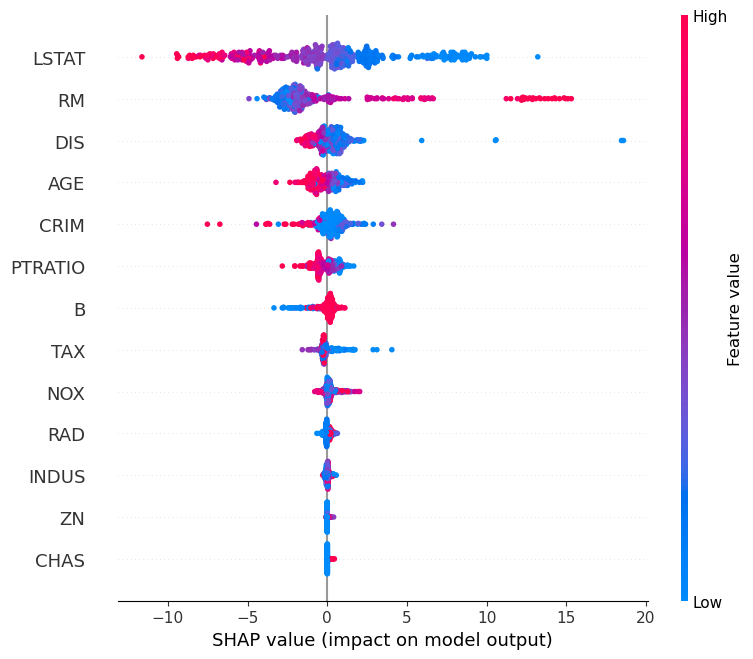

In [11]:
shap.summary_plot(shap_values, X_train)

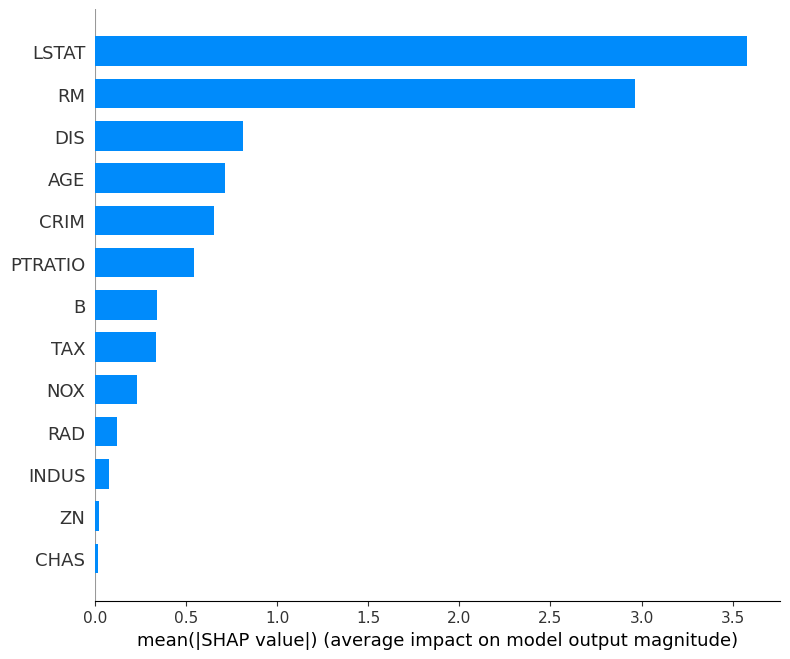

In [12]:
shap.summary_plot(shap_values, X_train, plot_type='bar')